In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!unzip drive/MyDrive/contact.zip

Streaming output truncated to the last 5000 lines.
  inflating: contact_1/58302_004013_Endzone_50_A31_H45.jpg  
  inflating: contact_1/58302_004013_Endzone_50_H45_A34.jpg  
  inflating: contact_1/58302_004013_Sideline_10_A31_H87.jpg  
  inflating: contact_1/58302_004013_Sideline_10_A55_H87.jpg  
  inflating: contact_1/58302_004013_Sideline_10_H70_A91.jpg  
  inflating: contact_1/58302_004013_Sideline_10_H70_H62.jpg  
  inflating: contact_1/58302_004013_Sideline_10_H72_A94.jpg  
  inflating: contact_1/58302_004013_Sideline_10_H75_A76.jpg  
  inflating: contact_1/58302_004013_Sideline_20_A54_H64.jpg  
  inflating: contact_1/58302_004013_Sideline_20_A76_H64.jpg  
  inflating: contact_1/58302_004013_Sideline_20_A91_H62.jpg  
  inflating: contact_1/58302_004013_Sideline_20_H70_A58.jpg  
  inflating: contact_1/58302_004013_Sideline_20_H70_H62.jpg  
  inflating: contact_1/58302_004013_Sideline_20_H72_A94.jpg  
  inflating: contact_1/58302_004013_Sideline_20_H75_A76.jpg  
  inflating: contact_

In [ ]:
!ls

contact_0  contact_1  drive  sample_data


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# !cd drive/MyDrive

In [ ]:
# import os
# os.path.join('drive/MyDrive/')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.regularizers import l2
import os

paths = pd.DataFrame(columns = ['image_path','label'])

directories = []
contacts = []

for name in os.listdir('contact_0'):
    path = os.path.join('contact_0' ,name)
    directories.append(path)
    contacts.append(0)

for name in os.listdir('contact_1'):
    path = os.path.join('contact_1' ,name)
    directories.append(path)
    contacts.append(1)

directories = np.array(directories)
contacts = np.array(contacts)
paths['image_path'] = directories
paths['label'] = contacts
#     img = cv2.imread(path)
#     plt.imshow(img)
#     plt.show()
#     break
#     name = name.replace('.jpg','')
#     l = name.split('_')
#     game_plays.append('_'.join(l[:2]))
#     views.append(l[2])
#     steps.append(int(l[3]))
# #     player_labels.append(l[4])
#     jersey_number1.append(int(l[4][1:]))
#     jersey_number2.append(int(l[5][1:]))
#     contact.append(1)
# #     print(img.shape)
#     img_resized = cv2.resize(img,(150,150))
#     img_arr.append(img_resized.flatten())

94765736/94765736 [==============================] - 5s 0us/step


Epoch 1/100
151/151 [==============================] - 61s 113ms/step - loss: 4.1924 - accuracy: 0.6707 - val_loss: 1.6446 - val_accuracy: 0.5390
Epoch 2/100
151/151 [==============================] - 14s 93ms/step - loss: 0.6559 - accuracy: 0.7278 - val_loss: 0.7707 - val_accuracy: 0.6981
Epoch 3/100
151/151 [==============================] - 14s 92ms/step - loss: 0.5196 - accuracy: 0.7523 - val_loss: 1.1070 - val_accuracy: 0.5603
Epoch 4/100
151/151 [==============================] - 14s 92ms/step - loss: 0.4844 - accuracy: 0.7715 - val_loss: 0.6024 - val_accuracy: 0.7217
Epoch 5/100
151/151 [==============================] - 14s 93ms/step - loss: 0.4514 - accuracy: 0.7913 - val_loss: 0.6185 - val_accuracy: 0.7209
Epoch 6/100
151/151 [==============================] - 14s 92ms/step - loss: 0.4281 - accuracy: 0.8064 - val_loss: 0.6678 - val_accuracy: 0.6214
Epoch 7/100
151/151 [==============================] - 14s 92ms/step - loss: 0.4123 - accuracy: 0.8170 - val_loss: 0.8181 - val_a

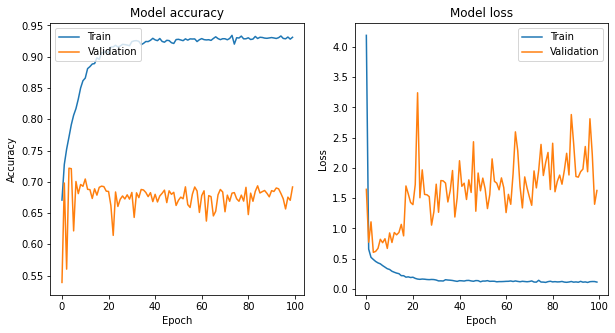

In [ ]:
# Load and preprocess the dataset
# data = pd.read_csv("path/to/your/csv_file.csv")  # Update the path to your CSV file



# Assume the DataFrame has columns "image_path" and "label"
X = paths["image_path"].values
y = paths["label"].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Load and preprocess images
def load_and_preprocess_images(image_paths, img_size=(150, 150)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=img_size)
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

X_train_processed = load_and_preprocess_images(X_train)
X_test_processed = load_and_preprocess_images(X_test)

# Create the ResNet model
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)  # Add L2 regularization
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# base_model = ResNet50(weights='imagenet', include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# Train the model with the dataset
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train, epochs=100, batch_size=100, validation_data=(X_test_processed, y_test))

# Evaluate the model
score = model.evaluate(X_test_processed, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('drive/MyDrive/Accuracy.pdf')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('drive/MyDrive/stats_lr_10e-3_l2_10e-2_dropout_half_batch_100_epoch100.pdf')
# plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for the test set
y_pred = model.predict(X_test_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

y_pred_train = model.predict(X_train_processed)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

cm = confusion_matrix(y_train, y_pred_classes_train)
print("Confusion Matrix:\n", cm)

118/118 [==============================] - 3s 15ms/step
Confusion Matrix:
 [[1386  646]
 [ 513 1214]]
470/470 [==============================] - 7s 14ms/step
Confusion Matrix:
 [[6945 1003]
 [  13 7074]]


Epoch 1/10
151/151 [==============================] - 52s 112ms/step - loss: 11.5755 - accuracy: 0.7155 - val_loss: 0.7367 - val_accuracy: 0.7380
Epoch 2/10
151/151 [==============================] - 15s 98ms/step - loss: 0.5498 - accuracy: 0.7668 - val_loss: 0.6151 - val_accuracy: 0.7308
Epoch 3/10
151/151 [==============================] - 15s 98ms/step - loss: 0.4920 - accuracy: 0.7935 - val_loss: 0.5673 - val_accuracy: 0.7438
Epoch 4/10
151/151 [==============================] - 15s 98ms/step - loss: 0.4588 - accuracy: 0.8132 - val_loss: 0.7770 - val_accuracy: 0.7122
Epoch 5/10
151/151 [==============================] - 15s 98ms/step - loss: 0.4160 - accuracy: 0.8343 - val_loss: 0.8372 - val_accuracy: 0.7244
Epoch 6/10
151/151 [==============================] - 15s 98ms/step - loss: 0.3822 - accuracy: 0.8504 - val_loss: 0.8842 - val_accuracy: 0.7151
Epoch 7/10
151/151 [==============================] - 15s 98ms/step - loss: 0.3560 - accuracy: 0.8571 - val_loss: 0.8080 - val_accurac

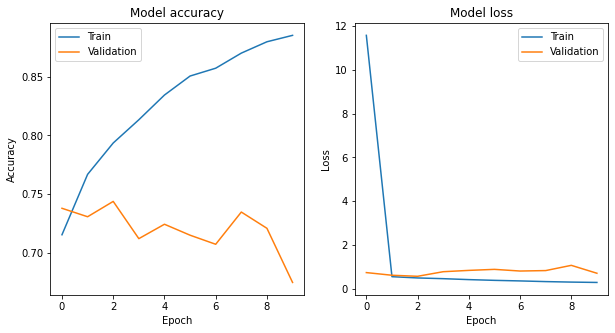

In [ ]:
# Load and preprocess the dataset
# data = pd.read_csv("path/to/your/csv_file.csv")  # Update the path to your CSV file


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2
# Assume the DataFrame has columns "image_path" and "label"
X = paths["image_path"].values
y = paths["label"].values

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Load and preprocess images
def load_and_preprocess_images(image_paths, img_size=(150, 150)):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=img_size)
        img = img_to_array(img)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

X_train_processed = load_and_preprocess_images(X_train)
X_test_processed = load_and_preprocess_images(X_test)

# Create the ResNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.1))(x)  # Add L2 regularization
x = Dropout(0.5)(x)  # Add dropout
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
# base_model = ResNet50(weights='imagenet', include_top=False)
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)
# model = Model(inputs=base_model.input, outputs=predictions)

# Train the model with the dataset
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train, epochs=10, batch_size=100, validation_data=(X_test_processed, y_test))

# Evaluate the model
score = model.evaluate(X_test_processed, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# plt.savefig('drive/MyDrive/Accuracy.pdf')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('drive/MyDrive/efficient_net_epochs10.pdf')
# plt.show()
